In [ ]:
#understanding the problem and data 
#import and inspect the data 
#Handle missing data 
#Explorate data characteriatics 
#perfom data transformation 
#visualise data relationships 
#handle outliers 
#communicate findings and insights 

Importing libraries

In [25]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

Loading dataset

In [26]:
df = pd.read_csv(r'C:\Git_respiratory\007_UAE Cancer dataset\_cancer_dataset_uae.csv')

In [104]:
df.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,...,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height,Age_category,Treatment_Delay_Days
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,...,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157,Older_Adult,4
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,...,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175,Young_Adult,26
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,...,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175,Elderly,171
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,...,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155,Elderly,37
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,...,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160,Middle-Aged_Adult,88


In [34]:
#shape of the dataset
df.shape

(10000, 20)

In [36]:
#database information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

In [37]:
#viewing data with missing values 
#df.isna().sum()
df.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Nationality                0
Emirate                    0
Diagnosis_Date             0
Cancer_Type                0
Cancer_Stage               0
Treatment_Type             0
Treatment_Start_Date       0
Hospital                   0
Primary_Physician          0
Outcome                    0
Death_Date              9008
Cause_of_Death          9008
Smoking_Status             0
Comorbidities           4047
Ethnicity                  0
Weight                     0
Height                     0
dtype: int64

In [30]:
df.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Nationality                0
Emirate                    0
Diagnosis_Date             0
Cancer_Type                0
Cancer_Stage               0
Treatment_Type             0
Treatment_Start_Date       0
Hospital                   0
Primary_Physician          0
Outcome                    0
Death_Date              9008
Cause_of_Death          9008
Smoking_Status             0
Comorbidities           4047
Ethnicity                  0
Weight                     0
Height                     0
dtype: int64

In [103]:
#viewing rows containing missing values
df[df['Cause_of_Death'].isnull()]

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,...,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height,Age_category,Treatment_Delay_Days
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,...,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157,Older_Adult,4
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,...,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175,Young_Adult,26
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,...,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175,Elderly,171
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,...,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155,Elderly,37
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,...,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160,Middle-Aged_Adult,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PAT009996,88,Male,Emirati,Ras Al Khaimah,2016-01-21,Ovarian,II,Surgery,2016-04-03,...,Recovered,NaN,NaN,Smoker,Cardiovascular Disease,European,55,168,Elderly,73
9996,PAT009997,43,Male,Emirati,Sharjah,2018-12-06,Ovarian,III,Radiation,2019-03-23,...,Under Treatment,NaN,NaN,Non-Smoker,Diabetes,African,98,175,Middle-Aged_Adult,107
9997,PAT009998,63,Female,Emirati,Sharjah,2016-06-11,Lung,III,Chemotherapy,2016-10-21,...,Under Treatment,NaN,NaN,Non-Smoker,NaN,East Asian,92,165,Older_Adult,132
9998,PAT009999,63,Female,Emirati,Abu Dhabi,2018-11-12,Lung,IV,Immunotherapy,2019-02-05,...,Recovered,NaN,NaN,Smoker,Hypertension,European,68,193,Older_Adult,85


In [39]:
#checking duplicates 
df.duplicated().sum()

np.int64(0)

In [96]:
#cheking for data type 
df['Diagnosis_Date'].dtypes

dtype('<M8[ns]')

In [97]:
import datetime as dt

#conver to date data type
df['Diagnosis_Date'] = pd.to_datetime(df['Diagnosis_Date'])
df['Treatment_Start_Date'] = pd.to_datetime(df['Treatment_Start_Date'])

In [98]:
#Check for categorical columns
df['Age_category'] = df['Age_category'].astype('category')

In [99]:
df.dtypes

Patient_ID                      object
Age                              int64
Gender                          object
Nationality                     object
Emirate                         object
Diagnosis_Date          datetime64[ns]
Cancer_Type                     object
Cancer_Stage                    object
Treatment_Type                  object
Treatment_Start_Date    datetime64[ns]
Hospital                        object
Primary_Physician               object
Outcome                         object
Death_Date                      object
Cause_of_Death                  object
Smoking_Status                  object
Comorbidities                   object
Ethnicity                       object
Weight                           int64
Height                           int64
Age_category                  category
Treatment_Delay_Days             int64
dtype: object

In [100]:
# Check for missing values
df[['Diagnosis_Date', 'Treatment_Start_Date']].isnull().sum()

Diagnosis_Date          0
Treatment_Start_Date    0
dtype: int64

In [101]:
#Calculate time difference
df['Treatment_Delay_Days'] = (df['Treatment_Start_Date'] - df['Diagnosis_Date']).dt.days

In [102]:
#Summary of delay
df['Treatment_Delay_Days'].describe()

count    10000.000000
mean        89.347000
std         52.299517
min          0.000000
25%         44.000000
50%         90.000000
75%        135.000000
max        179.000000
Name: Treatment_Delay_Days, dtype: float64

In [92]:
#Convert to datetime (if they aren’t already)

df['Diagnosis_Date'] = pd.to_datetime(df['Diagnosis_Date'])
df['Treatment_Start_Date'] = pd.to_datetime(df['Treatment_Start_Date'])

In [49]:
#view columns 
df[['Diagnosis_Date','Treatment_Start_Date']]

,Diagnosis_Date,Treatment_Start_Date
0,2020-11-30,2020-12-04
1,2015-10-10,2015-11-05
2,2018-02-13,2018-08-03
3,2022-02-04,2022-03-13
4,2019-12-03,2020-02-29
...,...,...
9995,2016-01-21,2016-04-03
9996,2018-12-06,2019-03-23
9997,2016-06-11,2016-10-21
9998,2018-11-12,2019-02-05


#create categories

In [50]:
#checking for number of unique ages in the age category 
df['Age'].nunique()

72

In [89]:
#Sort the unique values
np.sort(df['Age'].unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89])

In [90]:
#See unique combinations of Age and Age Category
df[['Age', 'Age_category']].drop_duplicates().sort_values(by='Age')

,Age,Age_category
79,18,Young_Adult
9,19,Young_Adult
6,20,Young_Adult
37,21,Young_Adult
87,22,Young_Adult
...,...,...
173,85,Elderly
179,86,Elderly
141,87,Elderly
44,88,Elderly


In [51]:
#checking for unique ages in the age category 
df['Age'].unique()

array([69, 32, 89, 78, 38, 41, 20, 39, 70, 19, 47, 55, 81, 77, 50, 75, 66,
       76, 59, 79, 64, 68, 72, 24, 56, 35, 21, 31, 26, 88, 61, 25, 52, 53,
       67, 23, 71, 80, 51, 65, 57, 43, 58, 46, 62, 82, 18, 28, 22, 45, 29,
       40, 54, 44, 60, 30, 49, 83, 74, 87, 73, 36, 85, 34, 86, 33, 37, 84,
       48, 42, 63, 27])

In [52]:
df['Age'].describe()

count    10000.000000
mean        53.539700
std         20.757324
min         18.000000
25%         36.000000
50%         53.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

In [84]:
# Compute age boundaries
min_age = df['Age'].min() 
q1 = df['Age'].quantile(0.25)
median = df['Age'].median()
q3 = df['Age'].quantile(0.75)
max_age = df['Age'].max()

# Define bins and labels
bins = [min_age, q1, median, q3, max_age + 1]  # add 1 to include max value in last bin
labels = ['Young_Adult', 'Middle-Aged_Adult', 'Older_Adult', 'Elderly']

# Create new column with binned age categories
df['Age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True, right=False)


In [87]:
#quick check
print(df[['Age', 'Age_category']].head())
print(df['Age_category'].value_counts())

   Age       Age_category
0   69        Older_Adult
1   32        Young_Adult
2   89            Elderly
3   78            Elderly
4   38  Middle-Aged_Adult
Age_category
Older_Adult          2617
Elderly              2515
Young_Adult          2493
Middle-Aged_Adult    2375
Name: count, dtype: int64


In [56]:
#creating bins for various ages 
min_age = df['Age'].min() 
twenty_fifth = df['Age'].quantile(0.25)
median = df['Age'].median()
seventy_fifth = df['Age'].quantile(0.75)
maximum = df['Age'].max()

#creating labels and bins for the various categories 
labels = ['Young_Adult','Middle-Aged_Adult','Older_Adult','Eldery']
bins = [min_age,twenty_fifth,median,seventy_fifth,maximum]

#creating categorical column for age 
df['Age_category'] = pd.cut(df['Age'], labels = labels, bins= bins)

In [59]:
df[['Age','Age_category']]

,Age,Age_category
0,69,Older_Adult
1,32,Young_Adult
2,89,Eldery
3,78,Eldery
4,38,Middle-Aged_Adult
...,...,...
9995,88,Eldery
9996,43,Middle-Aged_Adult
9997,63,Older_Adult
9998,63,Older_Adult


In [85]:
#verify how Age_category labels are assigned
df.groupby('Age_category')['Age'].describe()

C:\Users\brian\AppData\Local\Temp\ipykernel_27196\1327257237.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_category')['Age'].describe()


,count,mean,std,min,25%,50%,75%,max
Age_category,,,,,,,,
Young_Adult,2493.0,26.670678,5.267813,18.0,22.0,27.0,31.0,35.0
Middle-Aged_Adult,2375.0,43.840842,4.895102,36.0,40.0,44.0,48.0,52.0
Older_Adult,2617.0,62.083684,5.537565,53.0,57.0,62.0,67.0,71.0
Elderly,2515.0,80.442147,5.181984,72.0,76.0,80.0,85.0,89.0


In [86]:
#count how many entries fall into each group
df['Age_category'].value_counts()

Age_category
Older_Adult          2617
Elderly              2515
Young_Adult          2493
Middle-Aged_Adult    2375
Name: count, dtype: int64

Fixing incosistencies

In [81]:
for x in df.columns:
    unique_vals = df[x].unique()
    print(f"\nColumn: {x} ({len(unique_vals)} unique values)")
    print(unique_vals[:10], "..." if len(unique_vals) > 10 else "")


Column: Patient_ID (10000 unique values)
['PAT000001' 'PAT000002' 'PAT000003' 'PAT000004' 'PAT000005' 'PAT000006'
 'PAT000007' 'PAT000008' 'PAT000009' 'PAT000010'] ...

Column: Age (72 unique values)
[69 32 89 78 38 41 20 39 70 19] ...

Column: Gender (3 unique values)
['Female' 'Male' 'Other'] 

Column: Nationality (2 unique values)
['Emirati' 'Expatriate'] 

Column: Emirate (7 unique values)
['Umm Al Quwain' 'Abu Dhabi' 'Fujairah' 'Ras Al Khaimah' 'Sharjah' 'Dubai'
 'Ajman'] 

Column: Diagnosis_Date (3151 unique values)
<DatetimeArray>
['2020-11-30 00:00:00', '2015-10-10 00:00:00', '2018-02-13 00:00:00',
 '2022-02-04 00:00:00', '2019-12-03 00:00:00', '2015-02-10 00:00:00',
 '2023-02-27 00:00:00', '2018-04-05 00:00:00', '2022-12-12 00:00:00',
 '2018-05-29 00:00:00']
Length: 10, dtype: datetime64[ns] ...

Column: Cancer_Type (8 unique values)
['Liver' 'Leukemia' 'Lung' 'Pancreatic' 'Breast' 'Ovarian' 'Prostate'
 'Colorectal'] 

Column: Cancer_Stage (4 unique values)
['II' 'III' 'I' 'I

In [80]:
for x in df.columns:
    print(f"\nColumn: {x} ({df[x].nunique()} unique values)")
    print(df[x].unique())


Column: Patient_ID (10000 unique values)
['PAT000001' 'PAT000002' 'PAT000003' ... 'PAT009998' 'PAT009999'
 'PAT010000']

Column: Age (72 unique values)
[69 32 89 78 38 41 20 39 70 19 47 55 81 77 50 75 66 76 59 79 64 68 72 24
 56 35 21 31 26 88 61 25 52 53 67 23 71 80 51 65 57 43 58 46 62 82 18 28
 22 45 29 40 54 44 60 30 49 83 74 87 73 36 85 34 86 33 37 84 48 42 63 27]

Column: Gender (3 unique values)
['Female' 'Male' 'Other']

Column: Nationality (2 unique values)
['Emirati' 'Expatriate']

Column: Emirate (7 unique values)
['Umm Al Quwain' 'Abu Dhabi' 'Fujairah' 'Ras Al Khaimah' 'Sharjah' 'Dubai'
 'Ajman']

Column: Diagnosis_Date (3151 unique values)
<DatetimeArray>
['2020-11-30 00:00:00', '2015-10-10 00:00:00', '2018-02-13 00:00:00',
 '2022-02-04 00:00:00', '2019-12-03 00:00:00', '2015-02-10 00:00:00',
 '2023-02-27 00:00:00', '2018-04-05 00:00:00', '2022-12-12 00:00:00',
 '2018-05-29 00:00:00',
 ...
 '2018-01-18 00:00:00', '2020-12-30 00:00:00', '2020-12-15 00:00:00',
 '2018-10-05 

In [79]:
for x in df.columns:
    print(f"\nColumn: {x}")
    print(df[x].unique())


Column: Patient_ID
['PAT000001' 'PAT000002' 'PAT000003' ... 'PAT009998' 'PAT009999'
 'PAT010000']

Column: Age
[69 32 89 78 38 41 20 39 70 19 47 55 81 77 50 75 66 76 59 79 64 68 72 24
 56 35 21 31 26 88 61 25 52 53 67 23 71 80 51 65 57 43 58 46 62 82 18 28
 22 45 29 40 54 44 60 30 49 83 74 87 73 36 85 34 86 33 37 84 48 42 63 27]

Column: Gender
['Female' 'Male' 'Other']

Column: Nationality
['Emirati' 'Expatriate']

Column: Emirate
['Umm Al Quwain' 'Abu Dhabi' 'Fujairah' 'Ras Al Khaimah' 'Sharjah' 'Dubai'
 'Ajman']

Column: Diagnosis_Date
<DatetimeArray>
['2020-11-30 00:00:00', '2015-10-10 00:00:00', '2018-02-13 00:00:00',
 '2022-02-04 00:00:00', '2019-12-03 00:00:00', '2015-02-10 00:00:00',
 '2023-02-27 00:00:00', '2018-04-05 00:00:00', '2022-12-12 00:00:00',
 '2018-05-29 00:00:00',
 ...
 '2018-01-18 00:00:00', '2020-12-30 00:00:00', '2020-12-15 00:00:00',
 '2018-10-05 00:00:00', '2020-07-25 00:00:00', '2018-05-14 00:00:00',
 '2016-06-09 00:00:00', '2019-06-21 00:00:00', '2022-09-18 

In [60]:
for x in df.columns:
    print(df[x].unique())

['PAT000001' 'PAT000002' 'PAT000003' ... 'PAT009998' 'PAT009999'
 'PAT010000']
[69 32 89 78 38 41 20 39 70 19 47 55 81 77 50 75 66 76 59 79 64 68 72 24
 56 35 21 31 26 88 61 25 52 53 67 23 71 80 51 65 57 43 58 46 62 82 18 28
 22 45 29 40 54 44 60 30 49 83 74 87 73 36 85 34 86 33 37 84 48 42 63 27]
['Female' 'Male' 'Other']
['Emirati' 'Expatriate']
['Umm Al Quwain' 'Abu Dhabi' 'Fujairah' 'Ras Al Khaimah' 'Sharjah' 'Dubai'
 'Ajman']
<DatetimeArray>
['2020-11-30 00:00:00', '2015-10-10 00:00:00', '2018-02-13 00:00:00',
 '2022-02-04 00:00:00', '2019-12-03 00:00:00', '2015-02-10 00:00:00',
 '2023-02-27 00:00:00', '2018-04-05 00:00:00', '2022-12-12 00:00:00',
 '2018-05-29 00:00:00',
 ...
 '2018-01-18 00:00:00', '2020-12-30 00:00:00', '2020-12-15 00:00:00',
 '2018-10-05 00:00:00', '2020-07-25 00:00:00', '2018-05-14 00:00:00',
 '2016-06-09 00:00:00', '2019-06-21 00:00:00', '2022-09-18 00:00:00',
 '2016-06-11 00:00:00']
Length: 3151, dtype: datetime64[ns]
['Liver' 'Leukemia' 'Lung' 'Pancreatic' 

In [76]:
df.select_dtypes(include=['object', 'category', 'string']).describe()

,Patient_ID,Gender,Nationality,Emirate,Cancer_Type,Cancer_Stage,Treatment_Type,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Age_category
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,992,992,10000,5953,10000,9862
unique,10000,3,2,7,8,4,4,4,8614,3,867,2,3,3,5,4
top,PAT009984,Female,Emirati,Ajman,Leukemia,III,Radiation,Sheikh Khalifa Hospital,Dr. AJ25,Recovered,2019-01-27 00:00:00,Complications,Non-Smoker,Hypertension,South Asian,Older_Adult
freq,1,4985,5920,1497,1314,3041,2519,2541,5,4931,3,507,5038,2945,2083,2610


In [77]:
df['Gender'].value_counts()

Gender
Female    4985
Male      4827
Other      188
Name: count, dtype: int64

In [78]:
for col in df.select_dtypes(include='object').columns:
    print(f'\n{col} value counts:\n', df[col].value_counts())


Patient_ID value counts:
 Patient_ID
PAT009984    1
PAT009983    1
PAT009982    1
PAT009981    1
PAT009980    1
            ..
PAT000005    1
PAT000004    1
PAT000003    1
PAT000002    1
PAT000001    1
Name: count, Length: 10000, dtype: int64

Gender value counts:
 Gender
Female    4985
Male      4827
Other      188
Name: count, dtype: int64

Nationality value counts:
 Nationality
Emirati       5920
Expatriate    4080
Name: count, dtype: int64

Emirate value counts:
 Emirate
Ajman             1497
Fujairah          1471
Abu Dhabi         1471
Umm Al Quwain     1432
Dubai             1407
Sharjah           1382
Ras Al Khaimah    1340
Name: count, dtype: int64

Cancer_Type value counts:
 Cancer_Type
Leukemia      1314
Liver         1263
Ovarian       1259
Pancreatic    1243
Breast        1241
Lung          1233
Colorectal    1226
Prostate      1221
Name: count, dtype: int64

Cancer_Stage value counts:
 Cancer_Stage
III    3041
II     3036
I      2419
IV     1504
Name: count, dtype: int6

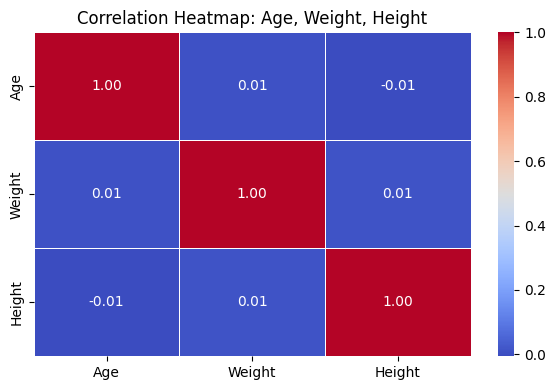

In [107]:
# Select relevant numeric columns
numerical_df = df[['Age', 'Weight', 'Height']]

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Age, Weight, Height')
plt.tight_layout()
plt.show()

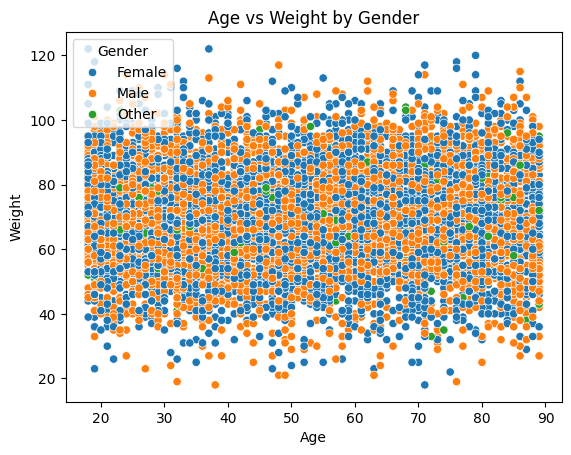

In [108]:
sns.scatterplot(data=df, x='Age', y='Weight', hue='Gender')
plt.title('Age vs Weight by Gender')
plt.show()

C:\Users\brian\AppData\Local\Temp\ipykernel_27196\3114600465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Cancer_Type', order=df['Cancer_Type'].value_counts().index, palette='magma')


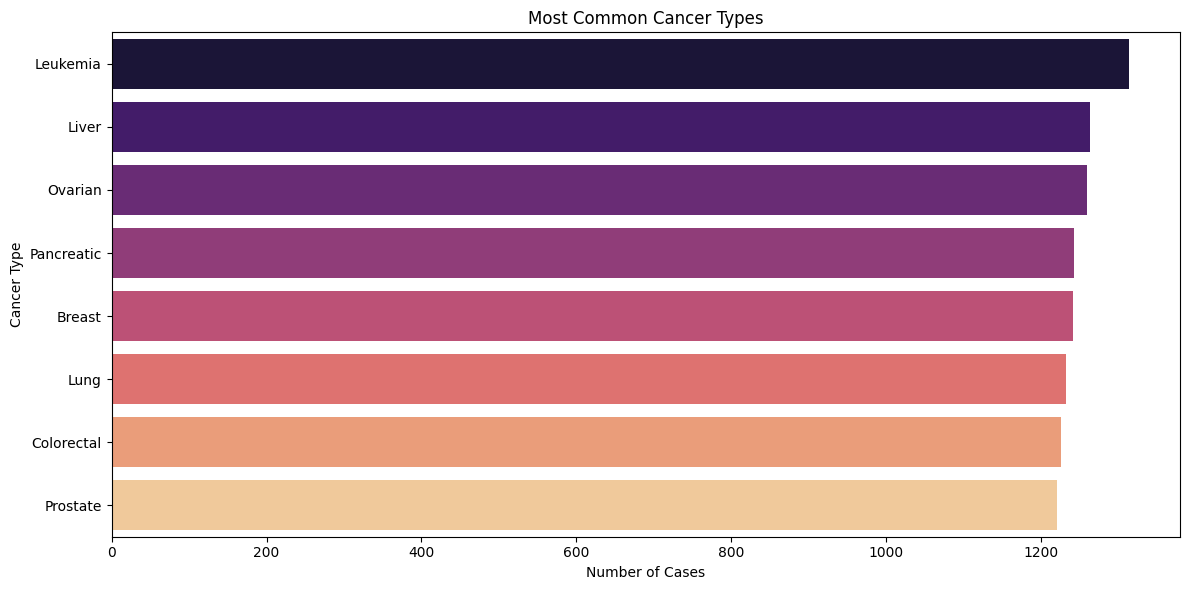

In [109]:
# Cancer Type Frequency
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Cancer_Type', order=df['Cancer_Type'].value_counts().index, palette='magma')
plt.title('Most Common Cancer Types')
plt.xlabel('Number of Cases')
plt.ylabel('Cancer Type')
plt.tight_layout()
plt.show()

C:\Users\brian\AppData\Local\Temp\ipykernel_27196\295822398.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cancer_Stage', y='Age', palette='pastel')


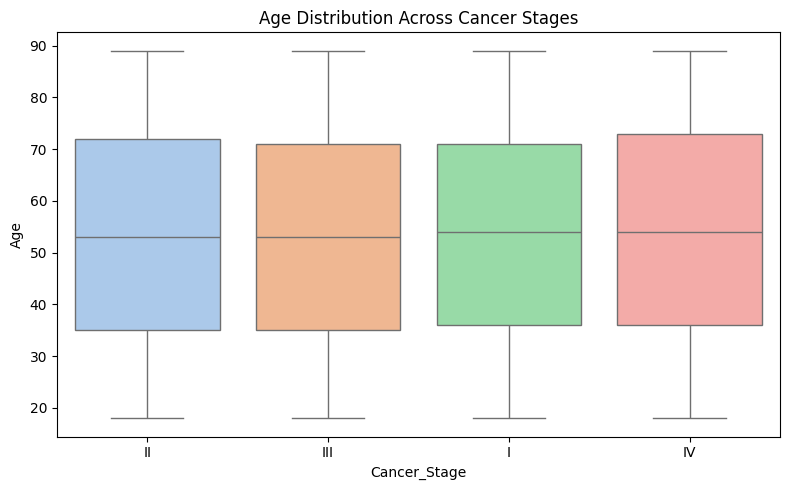

In [111]:
#Boxplot: Age by Cancer Stage
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Cancer_Stage', y='Age', palette='pastel')
plt.title('Age Distribution Across Cancer Stages')
plt.tight_layout()
plt.show()

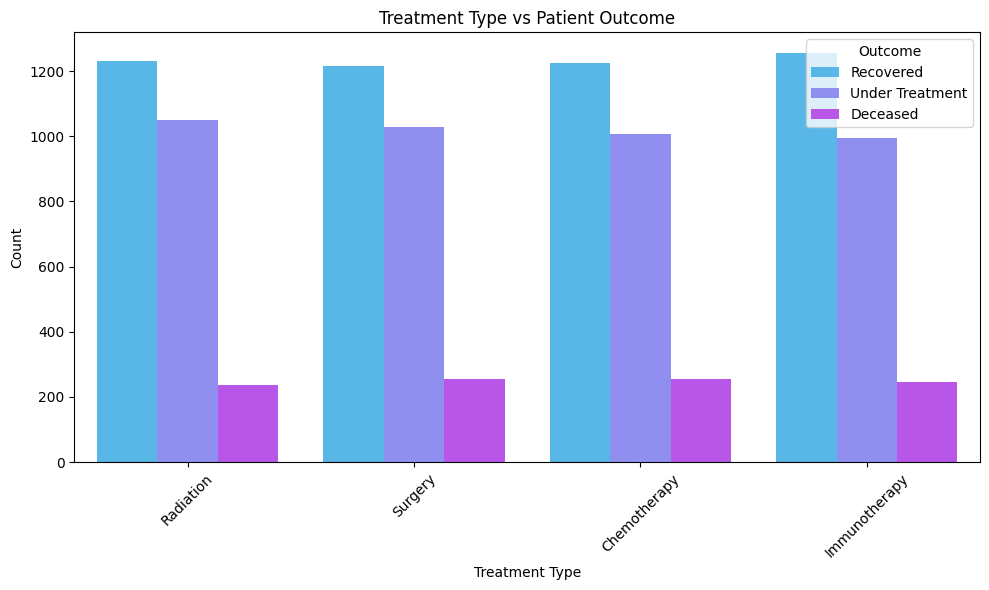

In [110]:
#Treatment Type by Outcome
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Treatment_Type', hue='Outcome', palette='cool')
plt.title('Treatment Type vs Patient Outcome')
plt.xlabel('Treatment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [115]:
#statidtical view of the categorical column 
df.select_dtypes(include = 'object').describe()

,Patient_ID,Gender,Nationality,Emirate,Cancer_Type,Cancer_Stage,Treatment_Type,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,992,992,10000,5953,10000
unique,10000,3,2,7,8,4,4,4,8614,3,867,2,3,3,5
top,PAT009984,Female,Emirati,Ajman,Leukemia,III,Radiation,Sheikh Khalifa Hospital,Dr. AJ25,Recovered,2019-01-27 00:00:00,Complications,Non-Smoker,Hypertension,South Asian
freq,1,4985,5920,1497,1314,3041,2519,2541,5,4931,3,507,5038,2945,2083


C:\Users\brian\AppData\Local\Temp\ipykernel_27196\2159186787.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x=c, data=df, kind='count', height=5, aspect=2, palette='Set2')


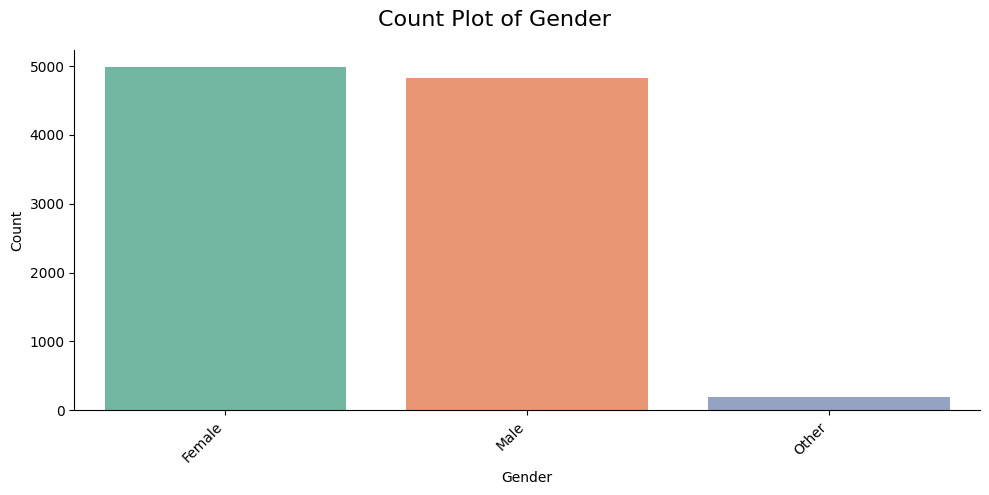

C:\Users\brian\AppData\Local\Temp\ipykernel_27196\2159186787.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x=c, data=df, kind='count', height=5, aspect=2, palette='Set2')


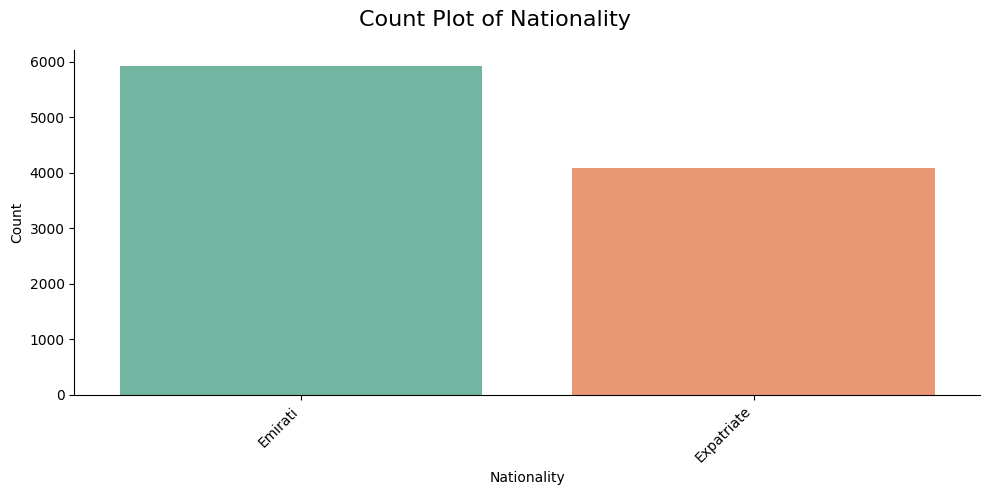

C:\Users\brian\AppData\Local\Temp\ipykernel_27196\2159186787.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x=c, data=df, kind='count', height=5, aspect=2, palette='Set2')


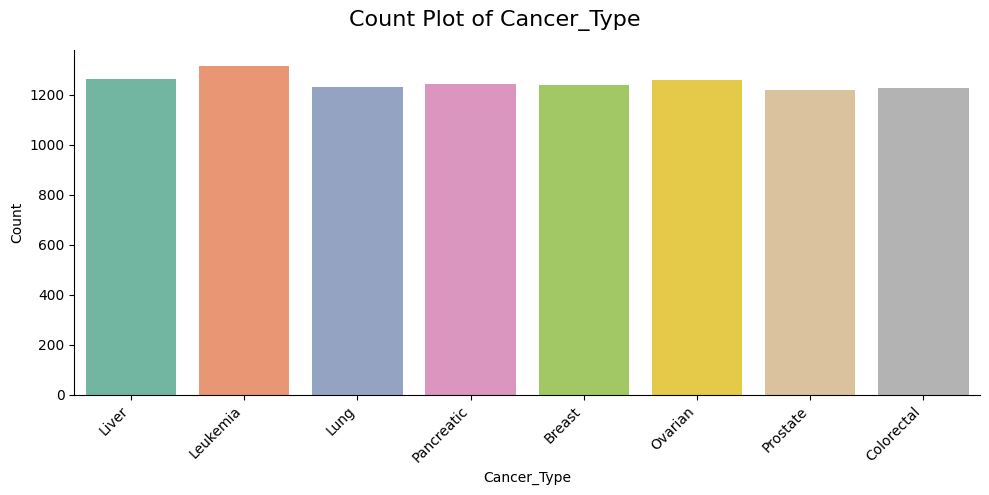

C:\Users\brian\AppData\Local\Temp\ipykernel_27196\2159186787.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x=c, data=df, kind='count', height=5, aspect=2, palette='Set2')


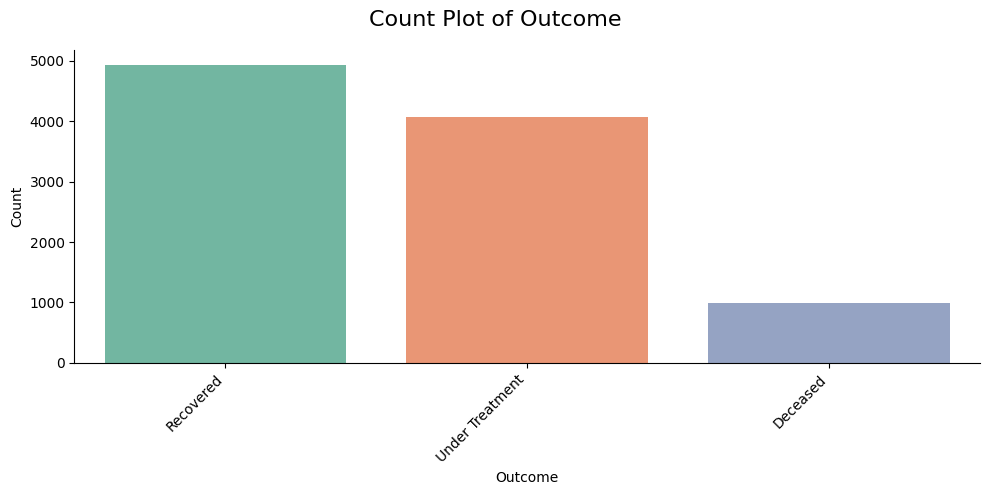

C:\Users\brian\AppData\Local\Temp\ipykernel_27196\2159186787.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x=c, data=df, kind='count', height=5, aspect=2, palette='Set2')


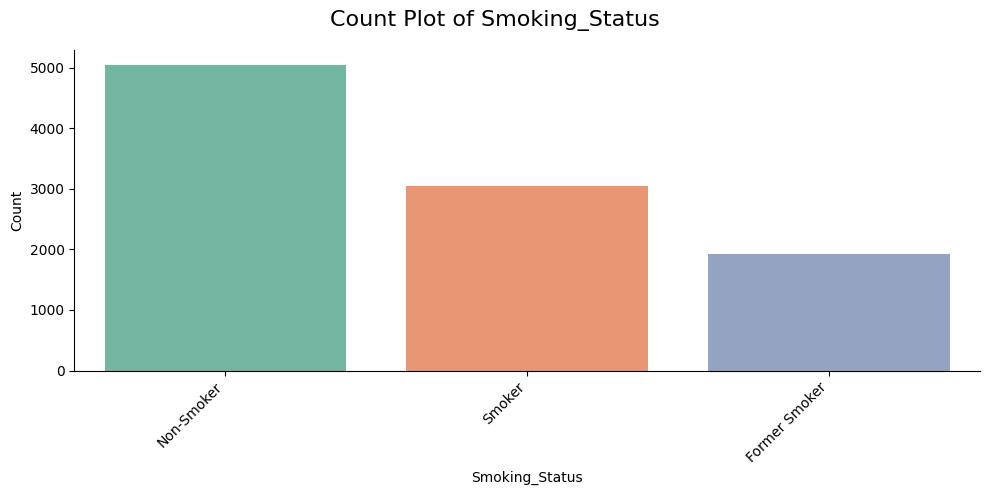

C:\Users\brian\AppData\Local\Temp\ipykernel_27196\2159186787.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x=c, data=df, kind='count', height=5, aspect=2, palette='Set2')


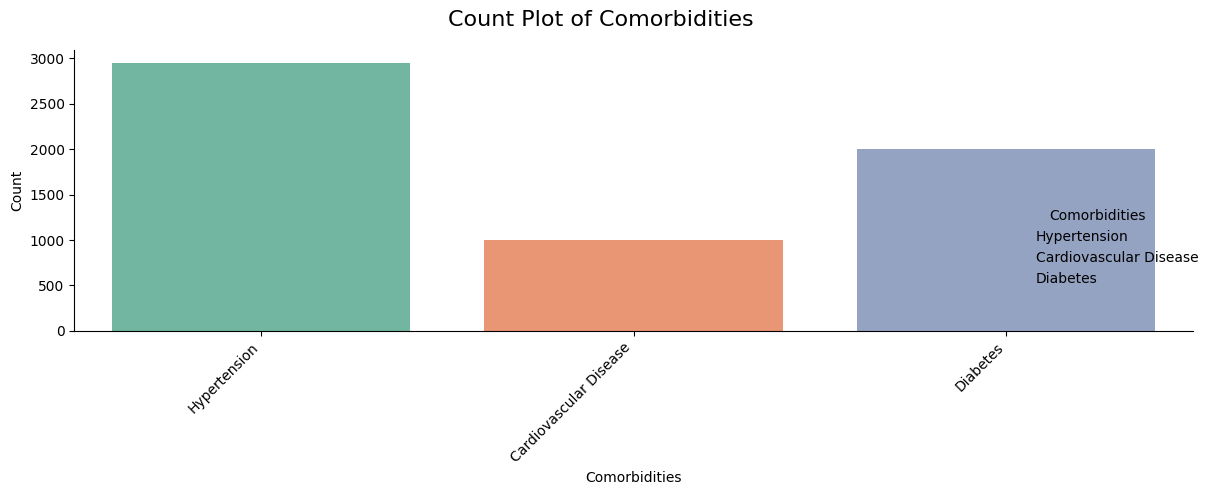

C:\Users\brian\AppData\Local\Temp\ipykernel_27196\2159186787.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x=c, data=df, kind='count', height=5, aspect=2, palette='Set2')


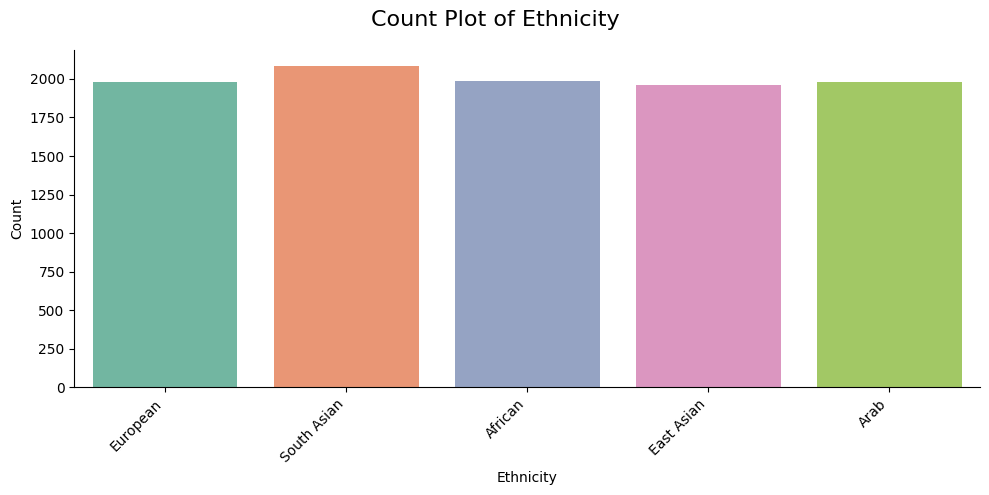

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

column_list = ['Gender','Nationality','Cancer_Type','Outcome','Smoking_Status','Comorbidities','Ethnicity']

def plot_bar_graph():
    for c in column_list:
        g = sns.catplot(x=c, data=df, kind='count', height=5, aspect=2, palette='Set2')
        g.set_axis_labels(c, 'Count')
        g.fig.suptitle(f'Count Plot of {c}', fontsize=16)
        g.set_xticklabels(rotation=45, ha='right')
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)  # To make room for suptitle
        plt.show()

plot_bar_graph()

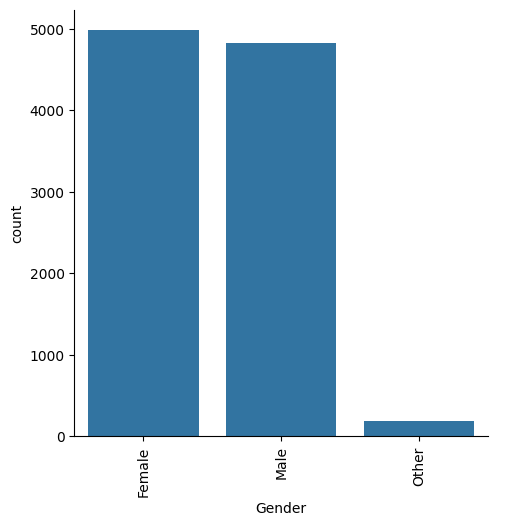

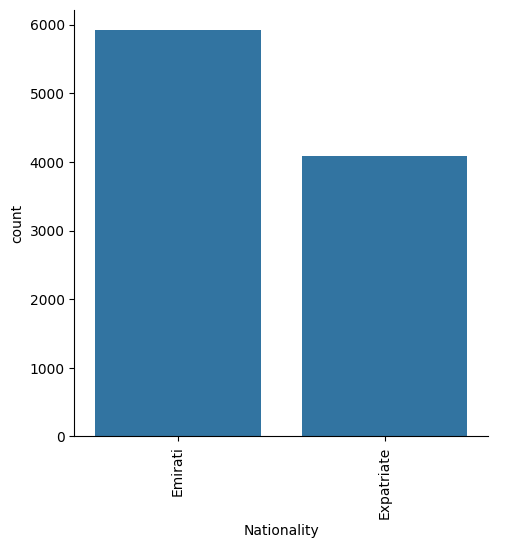

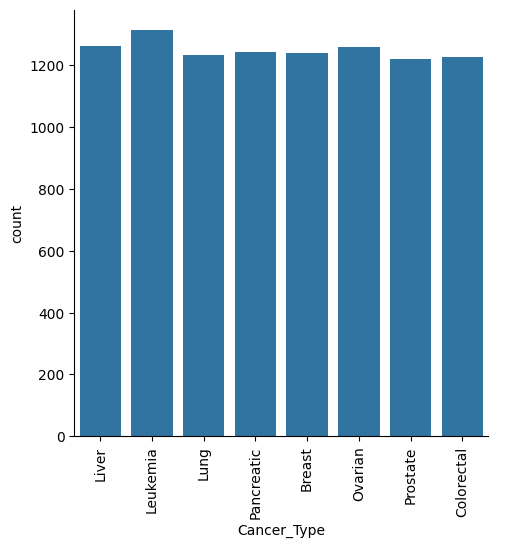

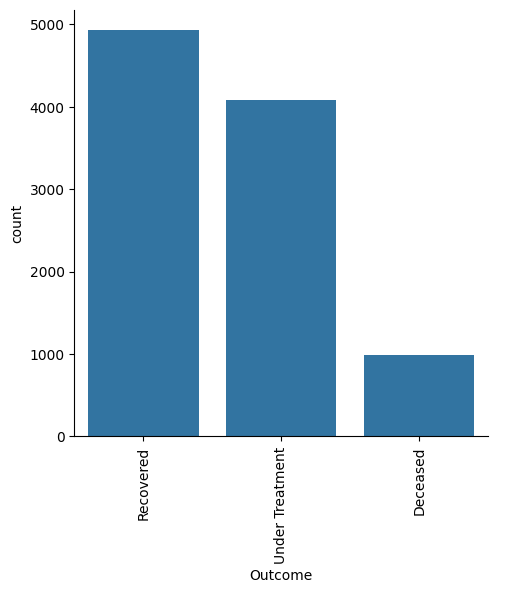

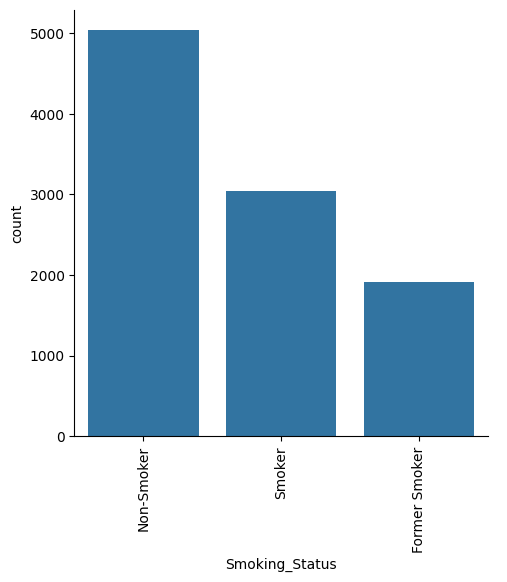

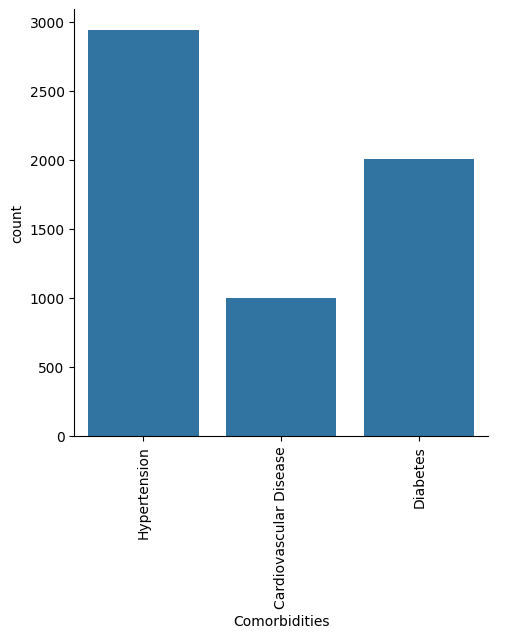

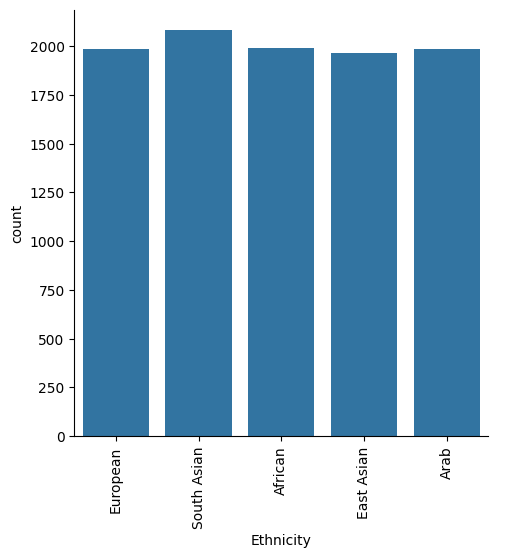

In [68]:
df.columns
column_list = ['Gender','Nationality','Cancer_Type','Outcome','Smoking_Status','Comorbidities','Ethnicity']

def plot_bar_graph():
     for c in column_list:
         g = sns.catplot(x = c, data= df, kind= 'count')
         g.set_xticklabels(rotation = 90)

         #plt.title(c)
         plt.show()
         
plot_bar_graph()

In [69]:
df.describe()

,Age,Diagnosis_Date,Treatment_Start_Date,Weight,Height
count,10000.000000,10000,10000,10000.000000,10000.000000
mean,53.539700,2019-08-08 15:31:58.080000,2019-11-05 23:51:38.880000,69.550000,169.347500
min,18.000000,2015-01-01 00:00:00,2015-01-07 00:00:00,18.000000,131.000000
25%,36.000000,2017-04-05 00:00:00,2017-07-05 00:00:00,60.000000,163.000000
50%,53.000000,2019-08-26 12:00:00,2019-11-24 00:00:00,70.000000,169.000000
75%,72.000000,2021-11-22 00:00:00,2022-02-18 00:00:00,80.000000,176.000000
max,89.000000,2024-03-01 00:00:00,2024-08-23 00:00:00,122.000000,208.000000
std,20.757324,NaN,NaN,14.933339,10.070118


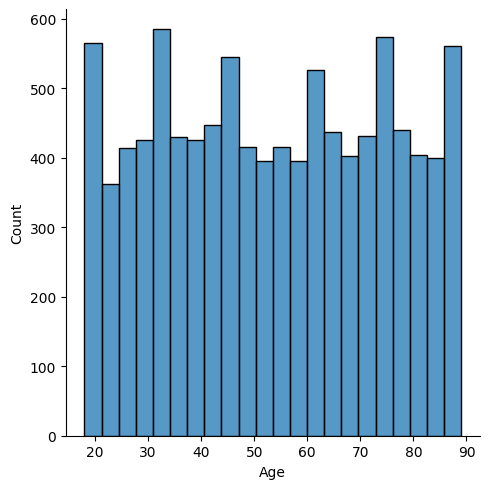

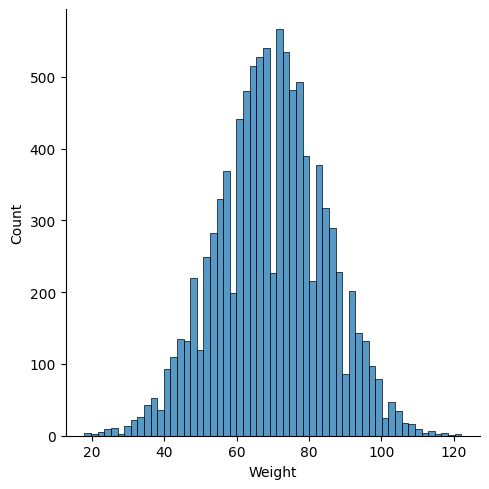

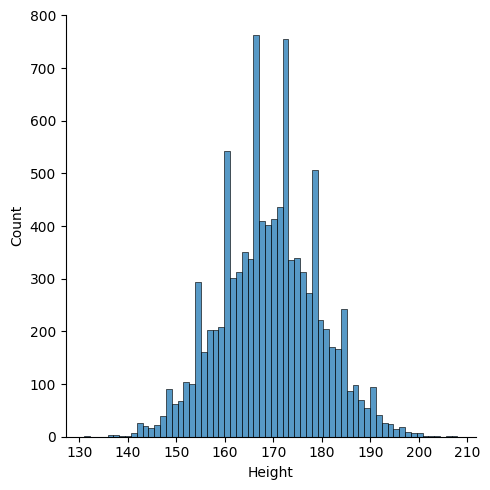

In [72]:
col = ['Age','Weight','Height']

def plot_bar_graph():
    for c in col:
        sns.displot(df[c])

        #plt.title(c)
        plt.show()
plot_bar_graph()

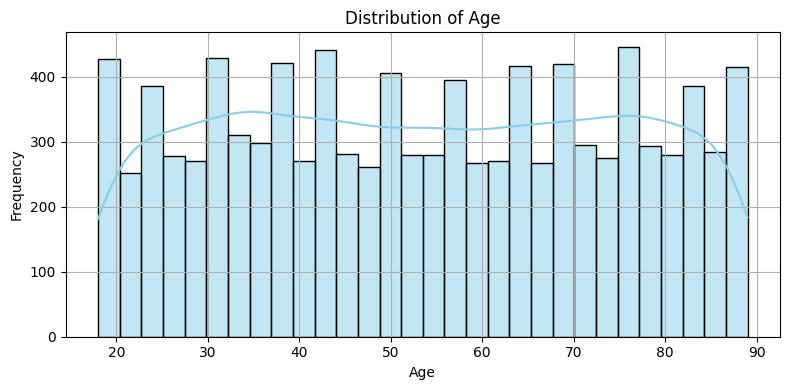

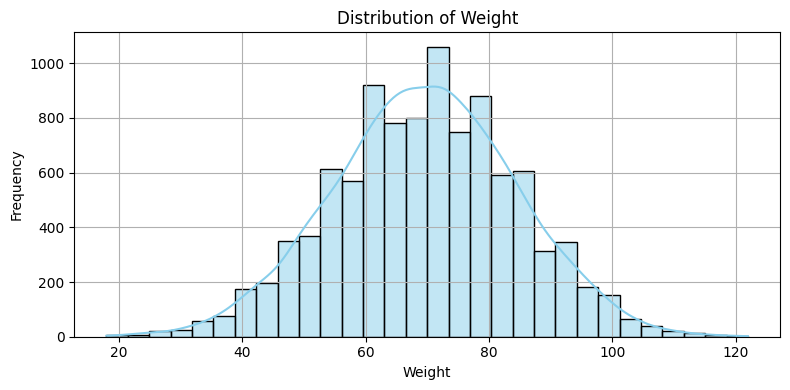

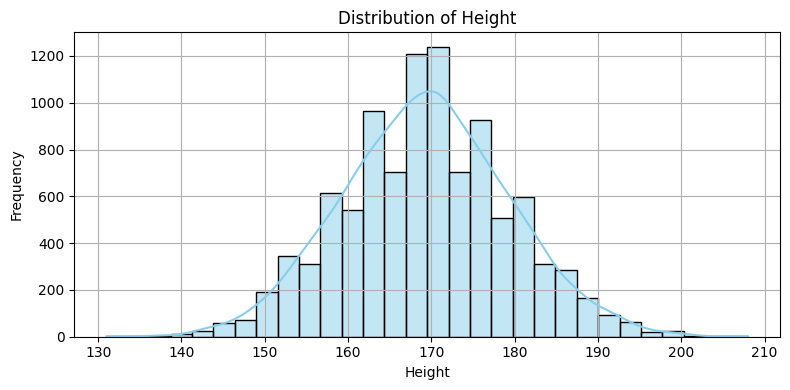

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is defined and contains numeric columns 'Age', 'Weight', 'Height'
col = ['Age', 'Weight', 'Height']

def plot_distribution_graphs():
    for c in col:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[c], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {c}')
        plt.xlabel(c)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_distribution_graphs()


In [74]:
sns.kdeplot(df[c])

NameError: name 'c' is not defined

Multivariate Analysis: Cancer Type vs Age and Gender

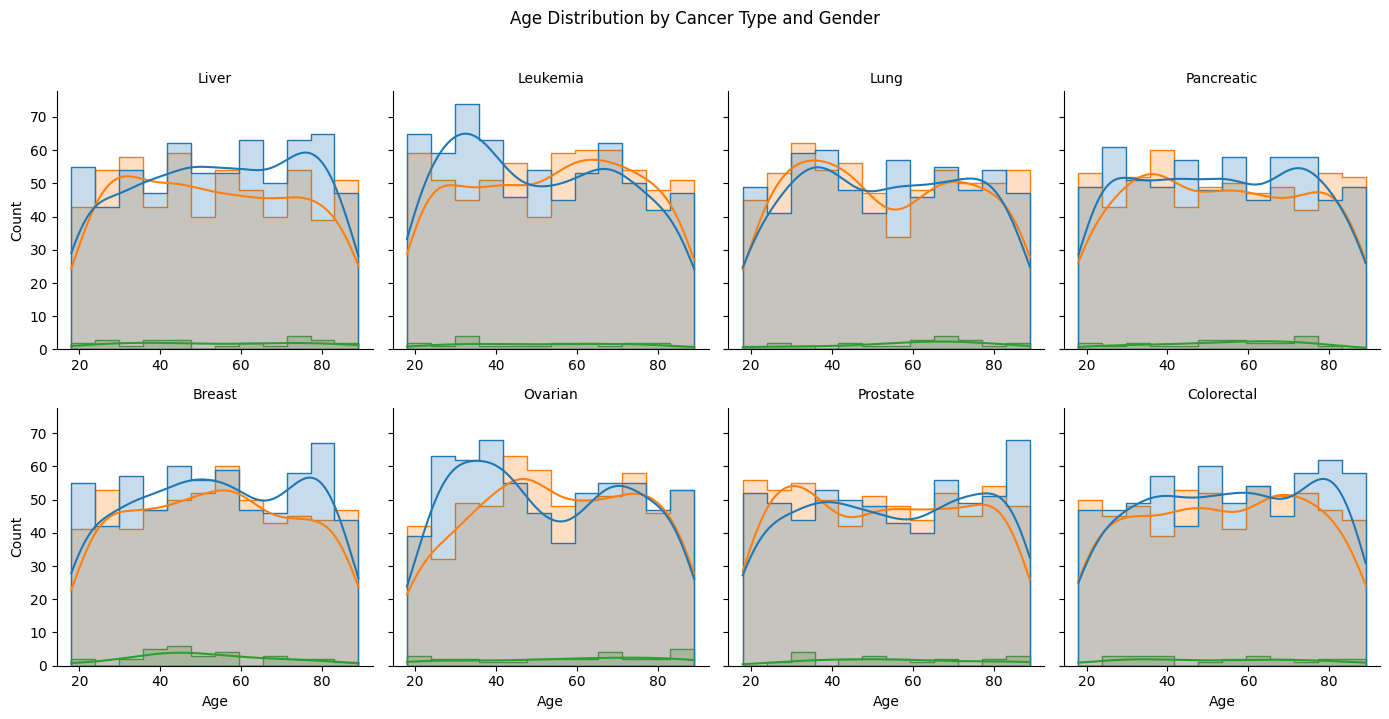

In [112]:
#Use FacetGrid to analyze how age varies across cancer types by gender
g = sns.FacetGrid(df, col="Cancer_Type", col_wrap=4, height=3.5, sharex=False)
g.map_dataframe(sns.histplot, x="Age", hue="Gender", element="step", kde=True)
g.set_titles("{col_name}")
g.fig.suptitle("Age Distribution by Cancer Type and Gender", y=1.02)
plt.tight_layout()
plt.show()


Crosstab Heatmap: Cancer Stage vs Treatment Type

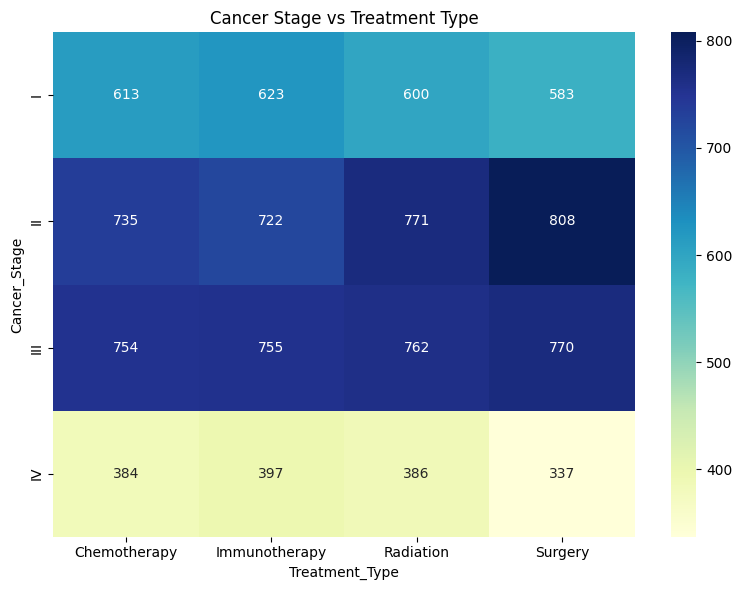

In [113]:
#his reveals trends like what treatments are used more in early vs late stages
stage_treatment = pd.crosstab(df['Cancer_Stage'], df['Treatment_Type'])
plt.figure(figsize=(8, 6))
sns.heatmap(stage_treatment, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Cancer Stage vs Treatment Type')
plt.tight_layout()
plt.show()

In [ ]:
#understanding the problem and data 
#import and inspect the data 
#Handle missing data 
#Explorate data characteriatics 
#perfom data transformation 
#visualise data relationships 
#handle outliers 
#communicate findings and insights 